In [1]:
from scipy.optimize import curve_fit
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def traduccion(name_img):
     name = str(name_img)+'.tif'
     img = mpimg.imread(name)
     return img, np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])

In [3]:
def acotar(arreglo, centro,dx, filacolumna):

     condicion = []
     for i in range(centro-dx):
          condicion.append(False)
     if dx > 0:
          for i in range(2*dx+1):
               condicion.append(True)
     else:
          condicion.append(True)

     cota = np.compress(condicion, arreglo, axis = filacolumna)
     return cota

def mean(arreglo,centro,dx, filacolumna):
     cota = acotar(arreglo,centro,dx, filacolumna)
     return cota.mean(axis=filacolumna)

def determinar_max(data,centro,dx, filacol):
     rows = mean(data, centro, dx, filacol)

     max = 0
     posicion = 0
     for i in range(len(rows)):
          if rows[i] > max:
               max = rows[i]
               posicion = i
     return posicion

def seccionar_modelar(data, centro, dx, filacol):

     rows = mean(data,centro, dx,filacol)

     seccion = []
     posicion = determinar_max(data,centro,dx,filacol)
     for i in range(81):
          seccion.append(rows[i+(posicion-int(81/2))])

     return seccion

In [7]:
def modelo_sinosoidal(x, i0, A, k, phi):
     return i0 + A * np.sin(k * x + phi)
def ajustar_modelo(lista_acotado):
     xvals = np.zeros(len(lista_acotado))
     for i in range(len(lista_acotado)):
          xvals[i] = i

     popt, pcov = curve_fit(modelo_sinosoidal,xvals, lista_acotado,p0=[12.5, 12,1.25/3 , 3.7])
     return popt[0],popt[1],popt[2],popt[3]

In [8]:
collection_piezo = ['0.00', '10.00','15.00', '20.00', '30.01', '40.00','45.01', '50.00', '60.00','74.99']

In [9]:
img, data = traduccion(collection_piezo[9])
rows,cols = data.shape
particiones = int(cols/4)
print((data.shape))
ks, phis = [],[]


(1024, 1280)


In [10]:
for i in range (particiones):
    sec = seccionar_modelar(data,2*i+2,2,1)
    i0, A, k, phi = ajustar_modelo(sec)
    ks.append(k)
    phis.append(phi)

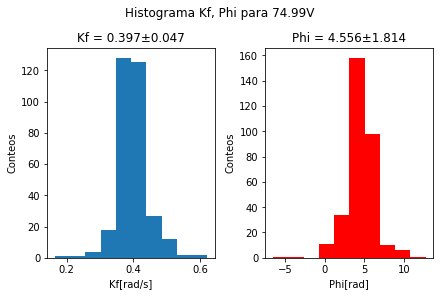

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2,constrained_layout=True)
fig.suptitle('Histograma Kf, Phi para ' + str(collection_piezo[9]) + 'V')
ax1.hist(ks)
ax2.hist(phis,color='red')
ax1.set_xlabel('Kf[rad/s]')
ax1.set_ylabel('Conteos')
ax1.set_title('Kf = '+str(round(np.mean(ks),3))+'±'+str(round(np.std(ks),3)))
ax2.set_xlabel('Phi[rad]')
ax2.set_ylabel('Conteos')
ax2.set_title('Phi = '+str(round(np.mean(phis),3))+'±'+str(round(np.std(phis),3)))
fig.savefig('Histograma_Piezo_' + str(collection_piezo[9]) + '.png')